## Data Cleaning

In [41]:
# Load the data
df <- read.csv("./data/spotify_genre_final.csv")

In [42]:
# Make a ggplot theme based on Spotify for the visuals

#' Variable with Spotify green color hex code
SPOTIFY_GREEN <- "#1db954"

#' Theme Based on Spotify (dark mode)
#'
#' @param ... Add any additional parameters for `theme()`
spotify_theme <- function(...) {
  theme_minimal() +
  theme(
      plot.title = element_text(face = "bold", color = "#1db954"),
      text = element_text(color = "#b3b3b3", size = 16),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      plot.background = element_rect(fill = "#212121"),
      axis.line = element_line(color = "#535353"),
      axis.text = element_text(color = "#535353"),
      strip.background = element_rect(fill = "#b3b3b3"),
      strip.text = element_text(colour = "#121212"),
      ...
  )
}

#' Theme Based on Spotify (light mode)
#'
#' @param ... Add any additional parameters for `theme()`
spotify_theme_light <- function(...) {
  theme_minimal() +
  theme(
      plot.title = element_text(face = "bold", color = "#1db954"),
      text = element_text(color = "#212121", size = 14),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      plot.background = element_rect(fill = "#FFFFFF"),
      axis.line = element_line(color = "#535353"),
      axis.text = element_text(color = "#535353"),
      strip.background = element_rect(fill = "#212121"),
      strip.text = element_text(colour = "#b3b3b3"),
      ...
  )
}

#' Fill Scale Based on Spotify
#'
#' Scale for fill values in ggplot2 based on colors in Spotify's brand palette.
#' This is designed for a discrete fill scale, not for continuous values.
#'
#' @param ... Add any additional `scale_fill_*()` parameters
scale_fill_spotify <- function(...) {
  scale_fill_manual(values = c("#1db954", "#535353", "#121212", "#b3b3b3", "#ffffff", "#4b917d", "#cdf564", "#f037a5"), ...)
}

#' Color Scale Based on Spotify
#'
#' Scale for color values in ggplot2 based on colors in Spotify's brand palette.
#' This is designed for a discrete color scale, not for continuous values.
#'
#' @param ... Add any additional `scale_color_*()` parameters
scale_color_spotify <- function(...) {
  scale_color_manual(values = c("#1db954", "#535353", "#121212", "#b3b3b3", "#ffffff", "#4b917d", "#cdf564", "#f037a5"), ...)
}

In [43]:
# Check for missing values

count_missing <- sum(is.na(df))
print(count_missing)

# Remove unnecessary columns

columns_to_remove <- c("Album_cover_link", "id", "release_date", "release_date_precision", "explicit")

df <- df[, !(names(df) %in% columns_to_remove)]

colnames(df) <- tolower(colnames(df))
colnames(df)[which(colnames(df) == "x...genre")] <- "genre"

colnames(df)

[1] 0


[1] "genre"            "title"            "artist"           "duration_ms"     
 [5] "popularity"       "total_tracks"     "danceability"     "energy"          
 [9] "key"              "loudness"         "mode"             "speechiness"     
[13] "acousticness"     "instrumentalness" "liveness"         "valence"         
[17] "tempo"            "time_signature"

## EDA


The downloaded binary packages are in
	/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T//Rtmpm1Lwts/downloaded_packages


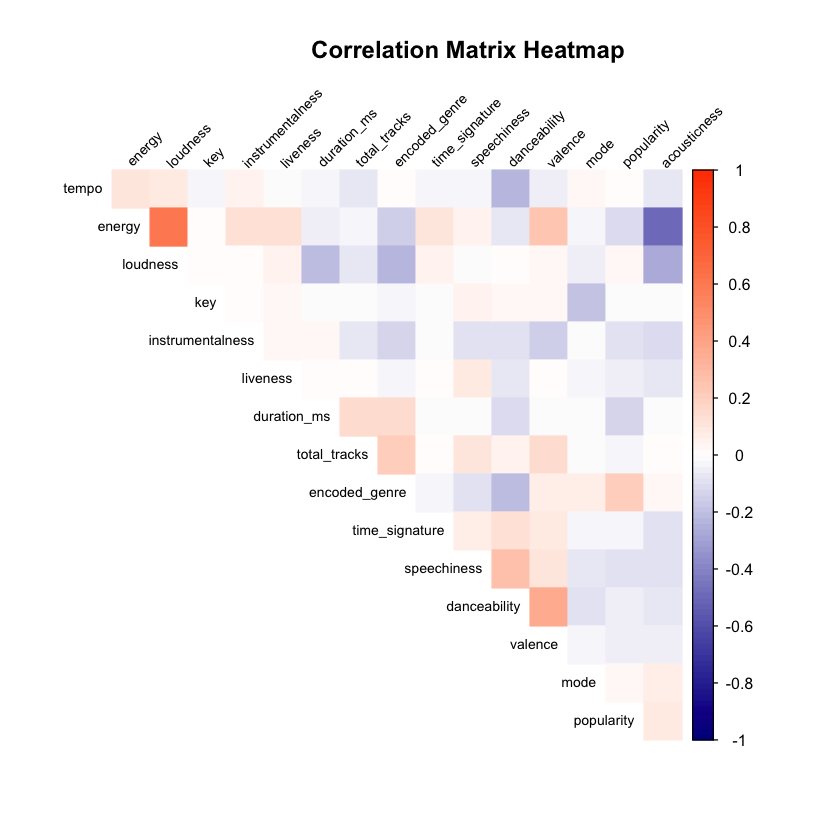

In [13]:
install.packages("corrplot", dependencies=TRUE)
library(corrplot)
library(dplyr)

# Convert Genre to numeric using one-hot encoding
df <- df %>%
  mutate(encoded_genre = as.numeric(factor(genre)))

# Select numeric columns (excluding genre)
numeric_columns <- df %>% select_if(is.numeric)

# Compute the correlation matrix
corr_matrix <- cor(numeric_columns)

# Set up the plotting area
par(mar = c(6, 6, 4, 2) + 0.1)

# Create a custom color palette
my_palette <- colorRampPalette(c("#00008B", "#FFFFFF", "#FF4500"))(100)

# Plot the heatmaps
corrplot(corr_matrix, method = "color", col = my_palette, add = FALSE, order = "hclust",
         tl.col = "black", tl.srt = 45, diag = FALSE, type = "upper", tl.cex = 0.7)
title(main = "Correlation Matrix Heatmap")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.4.2     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


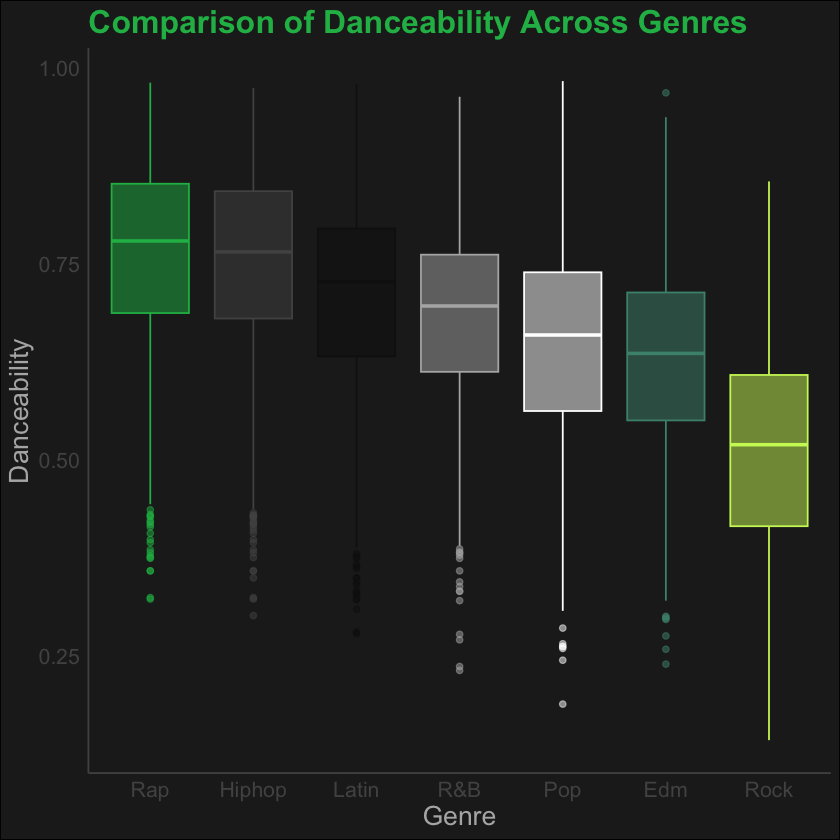

In [14]:
library(tidyverse)
library(ggplot2)

df |>
  mutate(genre = stringr::str_to_title(genre)) %>%
  group_by(genre) %>%
  mutate(avg_dance = mean(danceability)) %>%
  ungroup() %>%
  arrange(-avg_dance) %>%
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(x = genre, y = danceability, fill = genre, color = genre)) +
  geom_boxplot(alpha = 0.5) +
  labs(title = "Comparison of Danceability Across Genres",
       x = "Genre",
       y = "Danceability") +
  theme_minimal() +
  spotify_theme(
    legend.position = "none"
  ) +
  scale_fill_spotify() +
  scale_color_spotify()

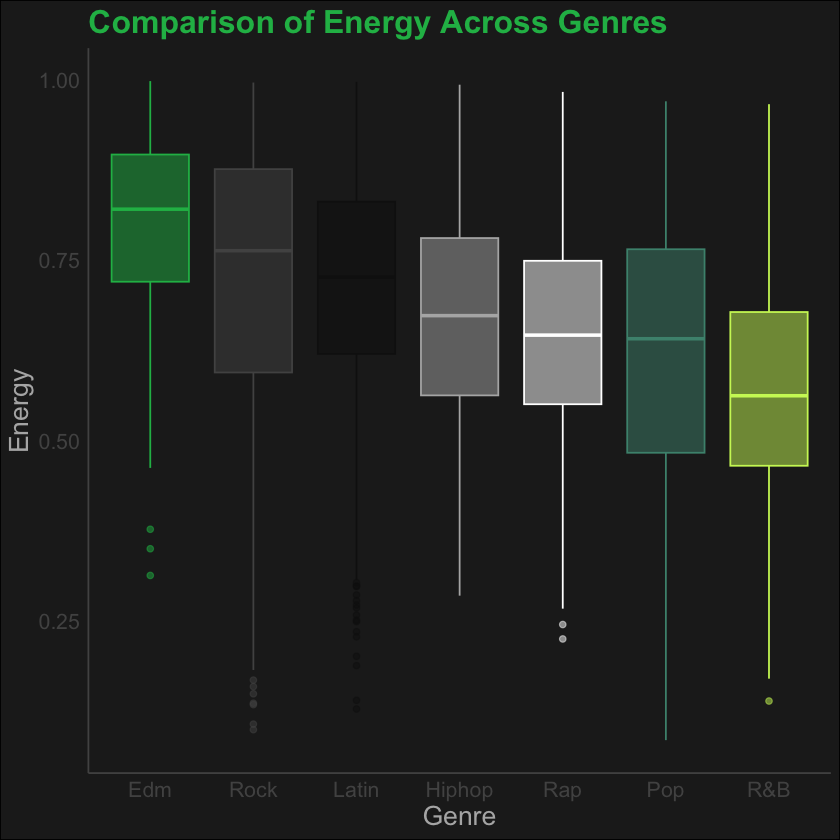

In [15]:
df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  group_by(genre) |>
  mutate(avg_energy = mean(energy)) |>
  ungroup() |>
  arrange(-avg_energy) |>
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(x = genre, y = energy, fill = genre, color = genre)) +
  geom_boxplot(alpha = 0.5) +
  labs(title = "Comparison of Energy Across Genres",
       x = "Genre",
       y = "Energy") +
  spotify_theme(
    legend.position = "none"
  ) +
  scale_fill_spotify() +
  scale_color_spotify()

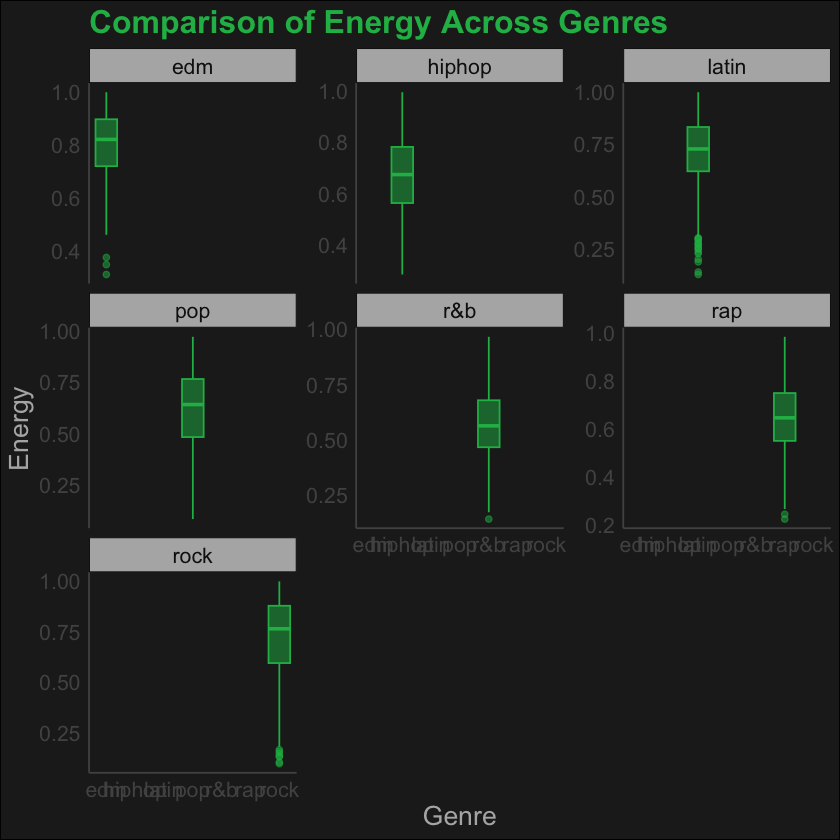

In [16]:
ggplot(df, aes(x = genre, y = energy)) +
  geom_boxplot(fill = SPOTIFY_GREEN, color = SPOTIFY_GREEN, alpha = 0.5) +
  facet_wrap(~genre, scales = "free_y") +
  labs(title = "Comparison of Energy Across Genres",
       x = "Genre",
       y = "Energy") +
  spotify_theme() +
  scale_fill_spotify() +
  scale_color_spotify()

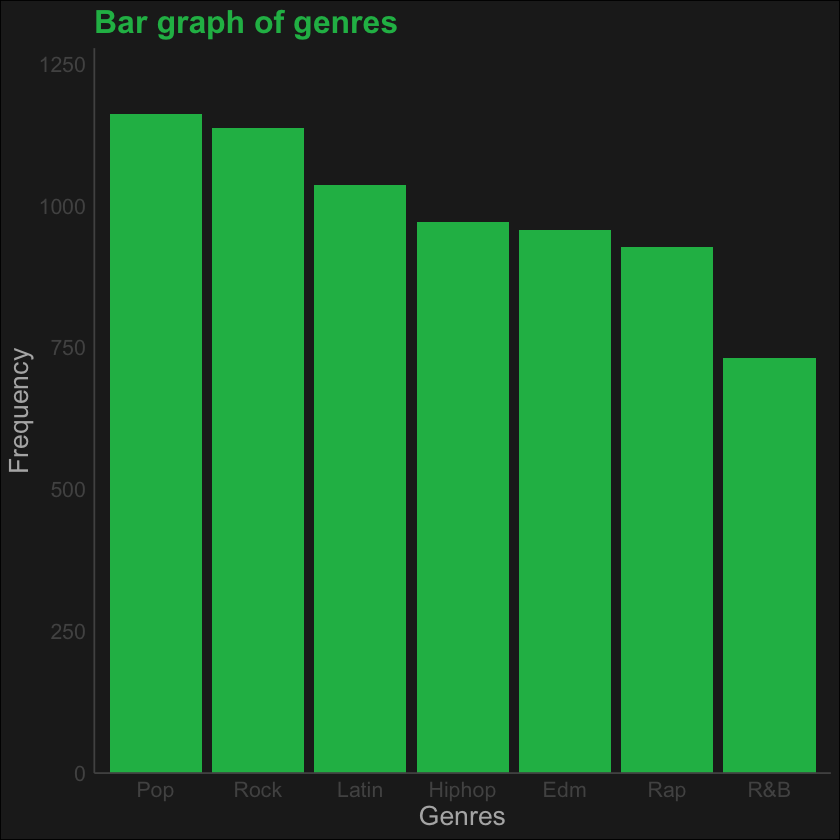

In [17]:
# bar graph

df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  ggplot(aes(x = reorder(genre, genre, function(x) -length(x)), fill = SPOTIFY_GREEN)) +
  geom_bar() +
  labs(title = "Bar graph of genres", x = "Genres", y = "Frequency") +
  spotify_theme(
    legend.position = "none"
  ) +
  scale_fill_spotify() +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.1))
  )

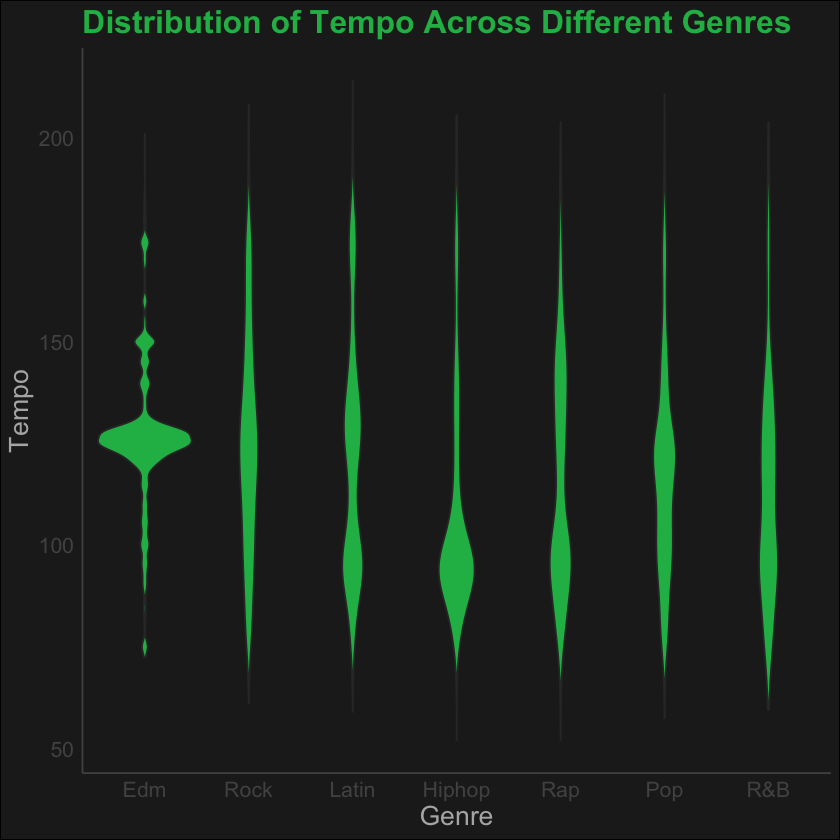

In [18]:
# violin plot

df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  group_by(genre) |>
  mutate(avg_energy = mean(energy)) |>
  ungroup() |>
  arrange(-avg_energy) |>
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(x = genre, y = tempo)) +
  geom_violin(fill = SPOTIFY_GREEN) +
  labs(title = "Distribution of Tempo Across Different Genres", x = "Genre", y = "Tempo") +
  spotify_theme()

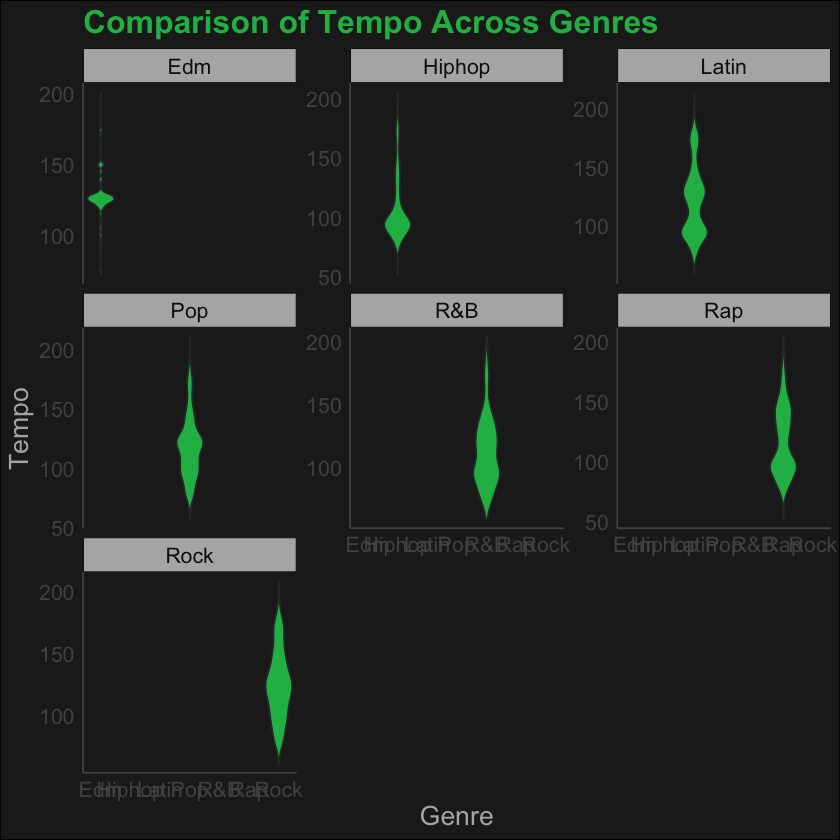

In [19]:
df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  ggplot(aes(x = genre, y = tempo)) +
  geom_violin(fill = SPOTIFY_GREEN) +
  facet_wrap(~genre, scales = "free_y") +
  labs(title = "Comparison of Tempo Across Genres",
       x = "Genre",
       y = "Tempo") +
  spotify_theme()

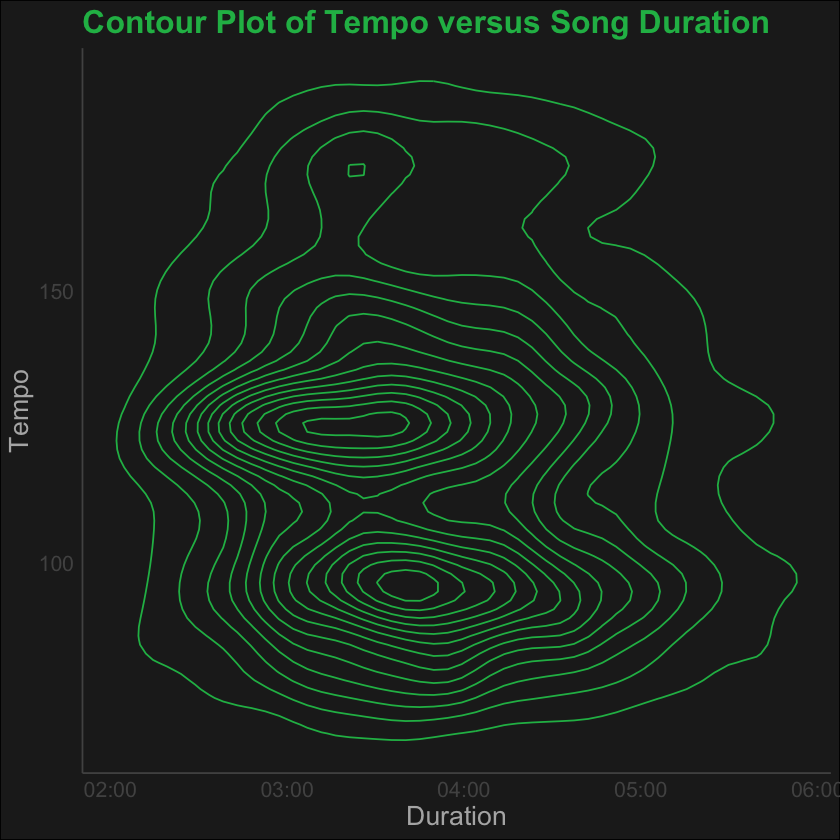

In [20]:
# 2d density plot

df |>
  mutate(duration_ms = lubridate::milliseconds(duration_ms)) |>
  ggplot(aes(x = duration_ms, y = tempo)) +
  geom_density_2d(color = SPOTIFY_GREEN) +
  labs(title = "Contour Plot of Tempo versus Song Duration", x = "Duration", y = "Tempo") +
  spotify_theme() +
  scale_x_time(labels = scales::label_time(format = "%M:%S"))

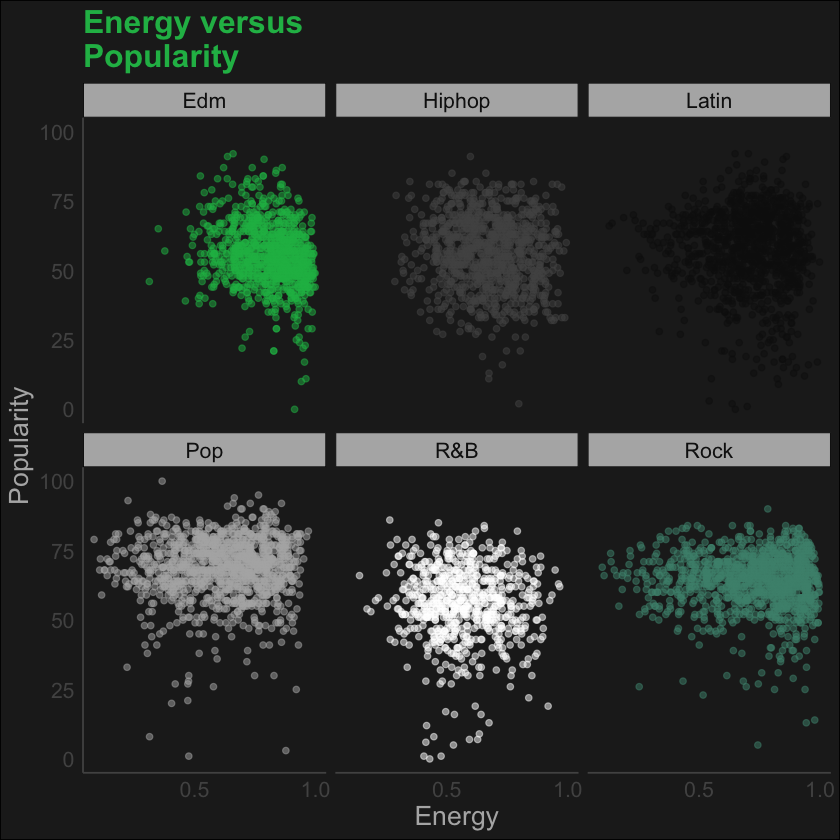

In [21]:
df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = energy, y = popularity)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Energy versus\nPopularity", x = "Energy", y = "Popularity") +
  spotify_theme(
    legend.position = "none"
  ) +
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify() +
  scale_x_continuous(n.breaks = 3)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


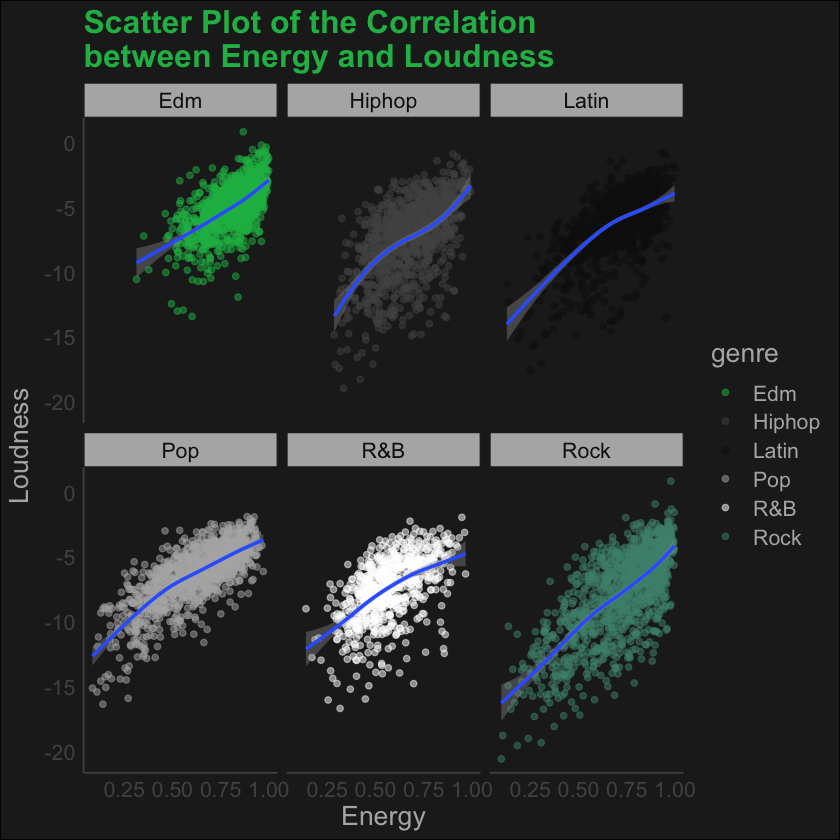


The downloaded binary packages are in
	/var/folders/1z/6nvrnkz13ms1y39fh2328y7m0000gn/T//Rtmpm1Lwts/downloaded_packages


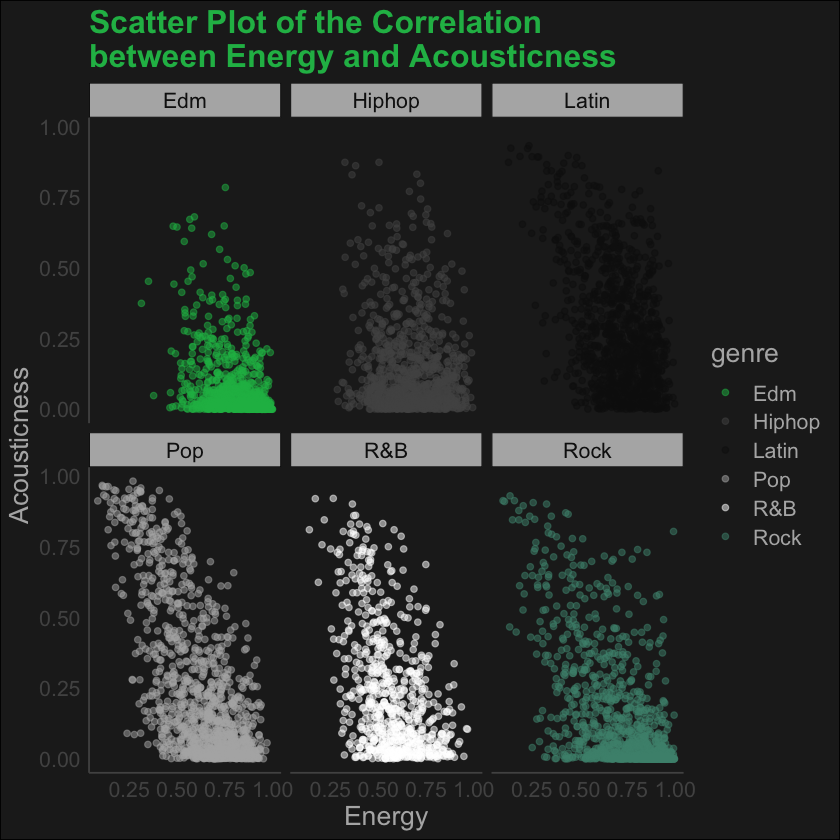

Saving 13 x 7 in image


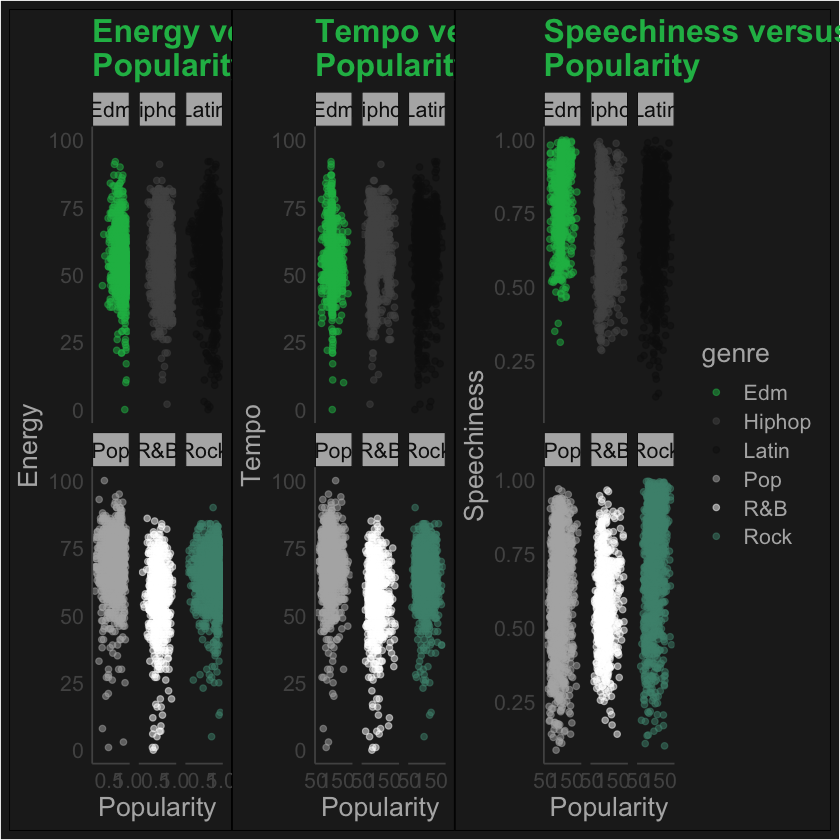

In [22]:
# scatter plot
library(tidyverse)
df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = energy, y = loudness)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Scatter Plot of the Correlation\nbetween Energy and Loudness", x = "Energy", y = "Loudness") +
  spotify_theme() +
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify() +
  geom_smooth()

df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = energy, y = acousticness)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Scatter Plot of the Correlation\nbetween Energy and Acousticness", x = "Energy", y = "Acousticness") +
  theme_minimal() +
  spotify_theme()+
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify()

install.packages("patchwork")
library(patchwork)
eng_pop <- df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = energy, y = popularity)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Energy versus\nPopularity", y = "Energy", x = "Popularity") +
  spotify_theme(
    legend.position = "none"
  ) +
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify() +
  scale_x_continuous(n.breaks = 3)

temp_pop <- df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = tempo, y = popularity)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Tempo verse\nPopularity", y = "Tempo", x = "Popularity") +
  spotify_theme(
    legend.position = "none"
  ) +
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify() +
  scale_x_continuous(n.breaks = 3)

temp_eng <- df |>
  mutate(genre = str_to_title(genre)) |>
  filter(genre != "Rap") |>
  ggplot(aes(x = tempo, y = energy)) +
  geom_point(aes(color = genre), alpha = 0.5) +
  labs(title = "Speechiness versus\nPopularity", y = "Speechiness", x = "Popularity") +
  spotify_theme() +
  facet_wrap(~genre, nrow = 2) +
  scale_color_spotify() +
  scale_x_continuous(n.breaks = 3)

eng_pop + temp_pop + temp_eng +
  plot_annotation(theme = spotify_theme())

ggsave("scatters-wider.png", width = 13)

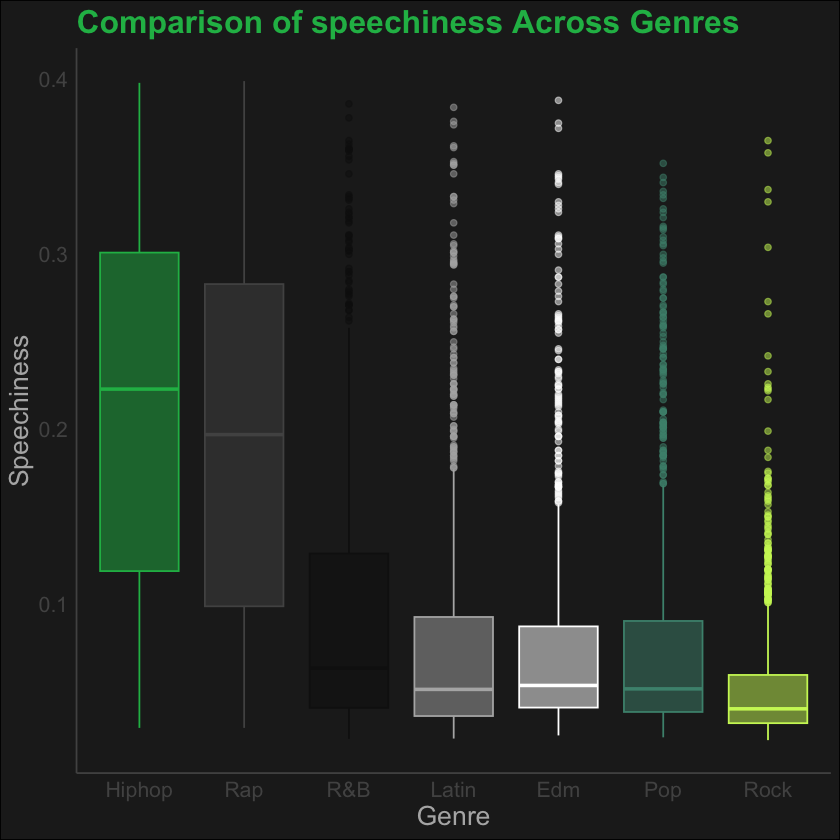

In [23]:
library(tidyverse)

df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  group_by(genre) |>
  mutate(avg_sp = mean(speechiness)) |>
  ungroup() |>
  arrange(-avg_sp) |>
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(x = genre, y = speechiness, fill = genre, color = genre)) +
  geom_boxplot(alpha = 0.5) +
  labs(title = "Comparison of speechiness Across Genres",
       x = "Genre",
       y = "Speechiness") +
  spotify_theme(
    legend.position = "none"
  ) +
  scale_fill_spotify() +
  scale_color_spotify()

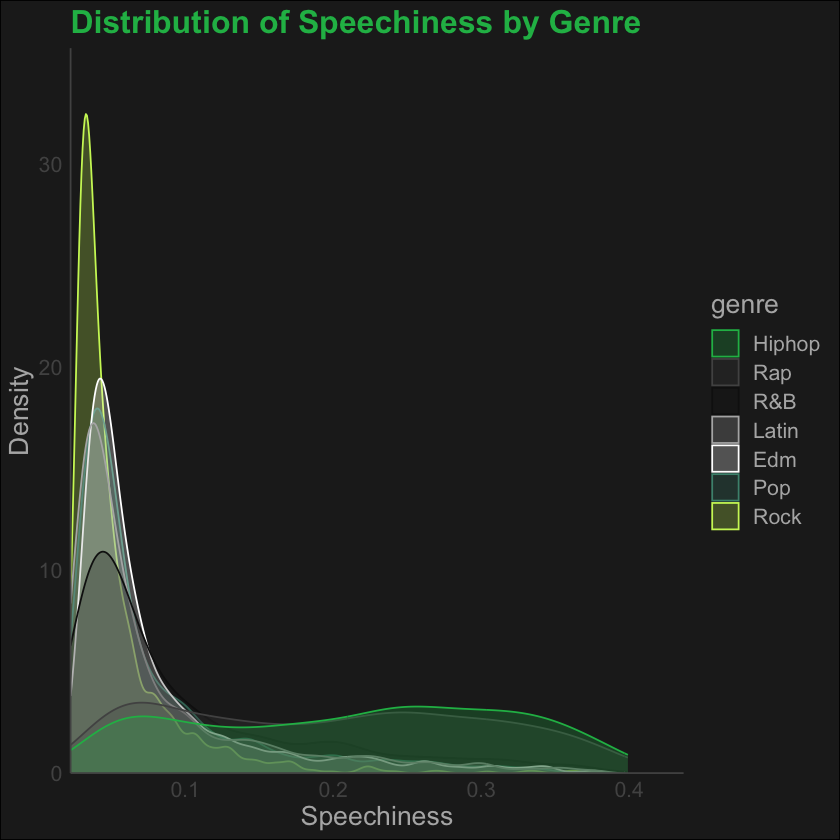

In [24]:
# df |>
#   mutate(genre = stringr::str_to_title(genre)) |>
#   group_by(genre) |>
#   mutate(avg_sp = mean(speechiness)) |>
#   ungroup() |>
#   arrange(-avg_sp) |>
#   mutate(genre = factor(genre, levels = unique(genre))) |>
#   ggplot(aes(fill = genre, x = speechiness, color = genre)) +
#   geom_density(alpha = 0.25) +
#   spotify_theme() +
#   scale_fill_spotify() +
#   scale_color_spotify() +
#   scale_y_continuous(
#     expand = expansion(mult = c(0, 0.1))
#   ) +
#   scale_x_continuous(
#     expand = expansion(mult = c(0, 0.1)),
#     trans = "log10"
#   ) +
#   labs(
#     y = "Density",
#     x = "Log of Speechiness",
#     title = "Distribution of Log of\nSpeechiness by Genre"
#   )

#   ggsave("log.png", height = 3)

  df |>
  mutate(genre = stringr::str_to_title(genre)) |>
  group_by(genre) |>
  mutate(avg_sp = mean(speechiness)) |>
  ungroup() |>
  arrange(avg_sp) |>
  mutate(genre = factor(genre, levels = unique(genre))) |>
  ggplot(aes(fill = genre, x = speechiness, color = genre)) +
  geom_density(alpha = 0.25) +
  spotify_theme() +
  scale_fill_manual(values = rev(c("#1db954", "#535353", "#121212", "#b3b3b3", "#ffffff", "#4b917d", "#cdf564"))) +
  scale_color_manual(values = rev(c("#1db954", "#535353", "#121212", "#b3b3b3", "#ffffff", "#4b917d", "#cdf564"))) +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.1))
  ) +
  scale_x_continuous(
    expand = expansion(mult = c(0, 0.1)),
  ) +
  labs(
    y = "Density",
    x = "Speechiness",
    title = "Distribution of Speechiness by Genre"
  ) +
  guides(fill = guide_legend(reverse = TRUE), color = guide_legend(reverse = TRUE))

`geom_smooth()` using formula = 'y ~ x'


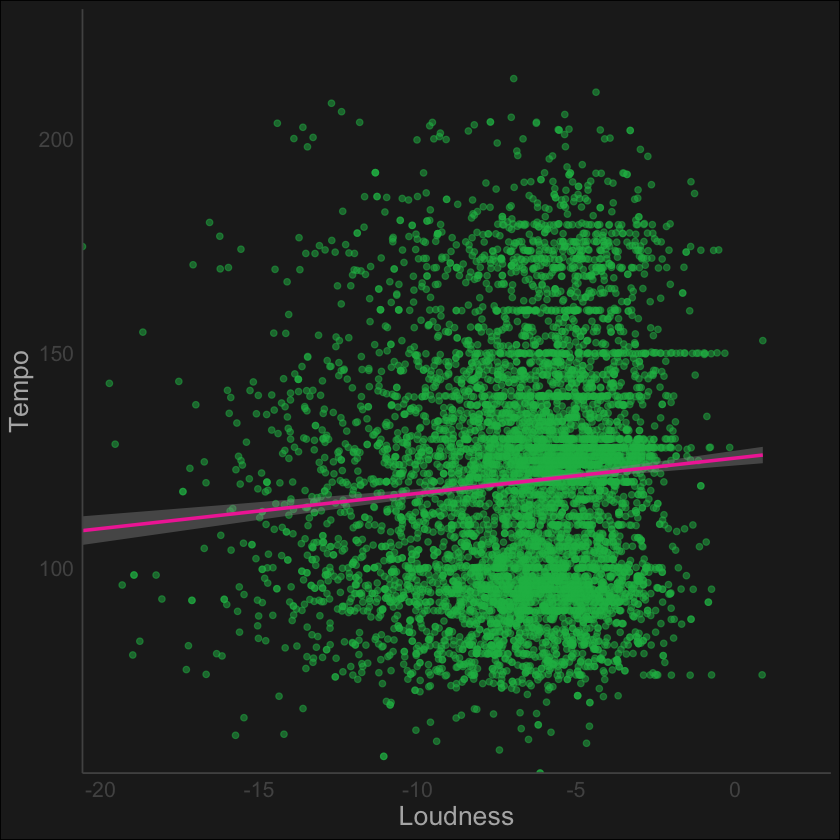

In [25]:
ggplot(df, aes(loudness, tempo)) +
  geom_jitter(color = SPOTIFY_GREEN, alpha = 0.5) +
  labs(x = "Loudness", y = "Tempo", y = "Distribution of Tempo vs. Loudness") +
  geom_smooth(method="lm", color = "#f037a5") +
  spotify_theme() +
  scale_x_continuous(
    expand = expansion(mult = c(0, 0.1))
  ) +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.1))
  )

`geom_smooth()` using formula = 'y ~ x'


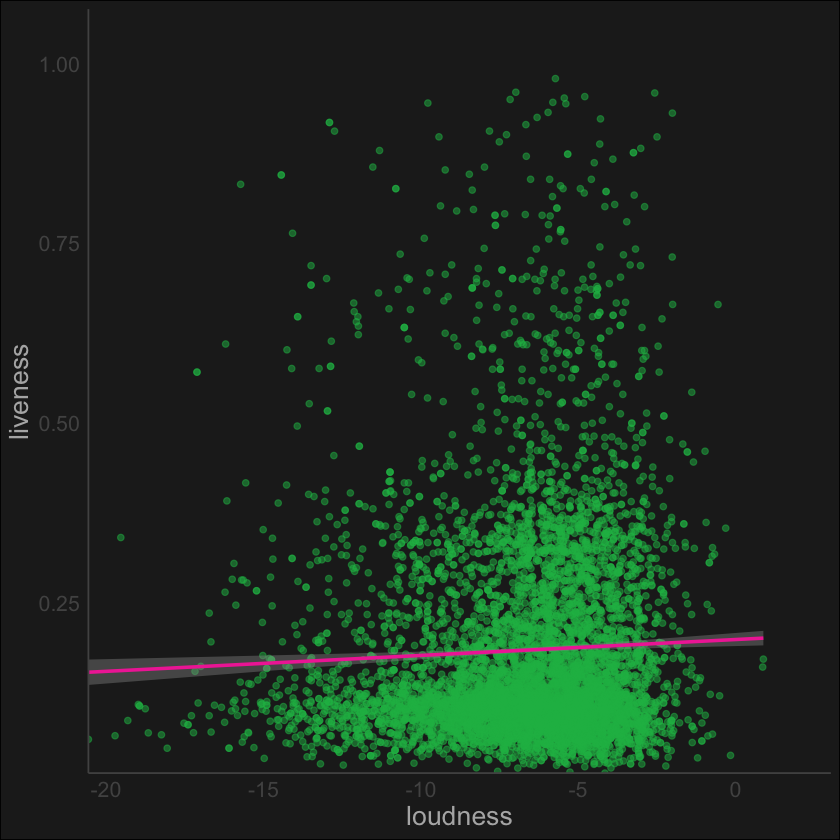

In [26]:
ggplot(df, aes(loudness, liveness)) +
  geom_jitter(color = SPOTIFY_GREEN, alpha = 0.5) +
  labs(x = "loudness", y = "liveness") +
  geom_smooth(method="lm", color = "#f037a5") +
  spotify_theme() +
  scale_x_continuous(
    expand = expansion(mult = c(0, 0.1))
  ) +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.1))
  )

# A tibble: 7 x 2
  genre  average_popularity
  <chr>               <dbl>
1 edm                  55.4
2 hiphop               56.3
3 latin                57.8
4 pop                  68.6
5 r&b                  55.8
6 rap                  62.8
7 rock                 63.7


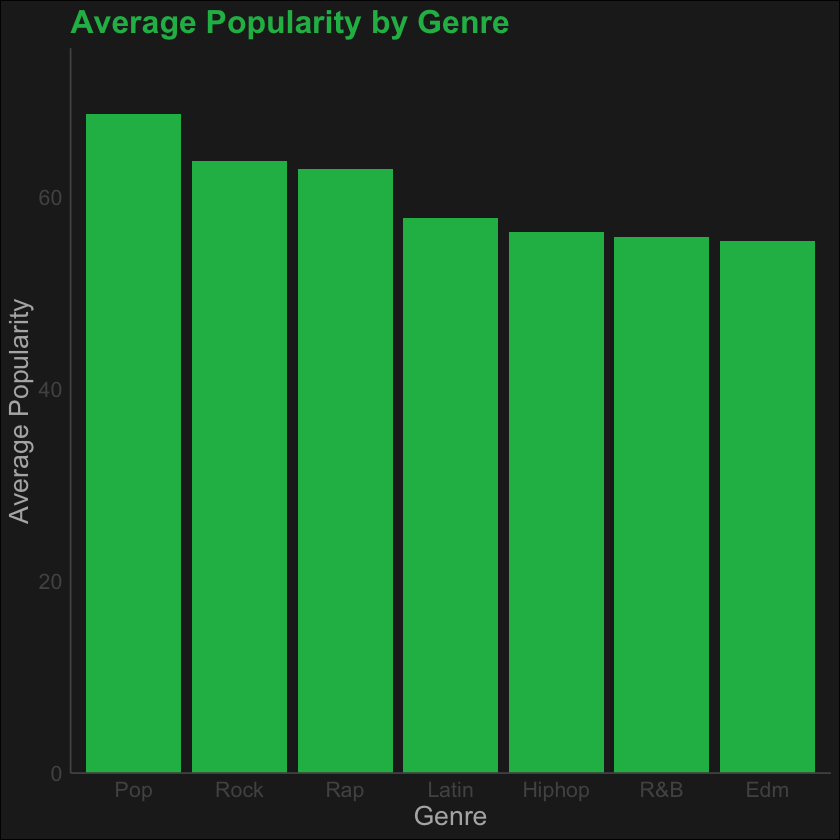

In [27]:
library(dplyr)
library(ggplot2)
average_popularity_by_genre <- df %>%
  group_by(genre) %>%
  summarize(average_popularity = mean(popularity, na.rm = TRUE))
print(average_popularity_by_genre)

average_popularity_by_genre |>
  mutate(genre = stringr::str_to_title(genre)) |>
  arrange(-average_popularity) |>
  mutate(genre = factor(genre, levels = unique(genre))) |>
  ggplot(aes(x = genre, y = average_popularity)) +
  geom_bar(stat = "identity", fill = SPOTIFY_GREEN) +
  labs(title = "Average Popularity by Genre",
       x = "Genre",
       y = "Average Popularity") +
  theme_minimal() +
  spotify_theme() +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.1))
  )

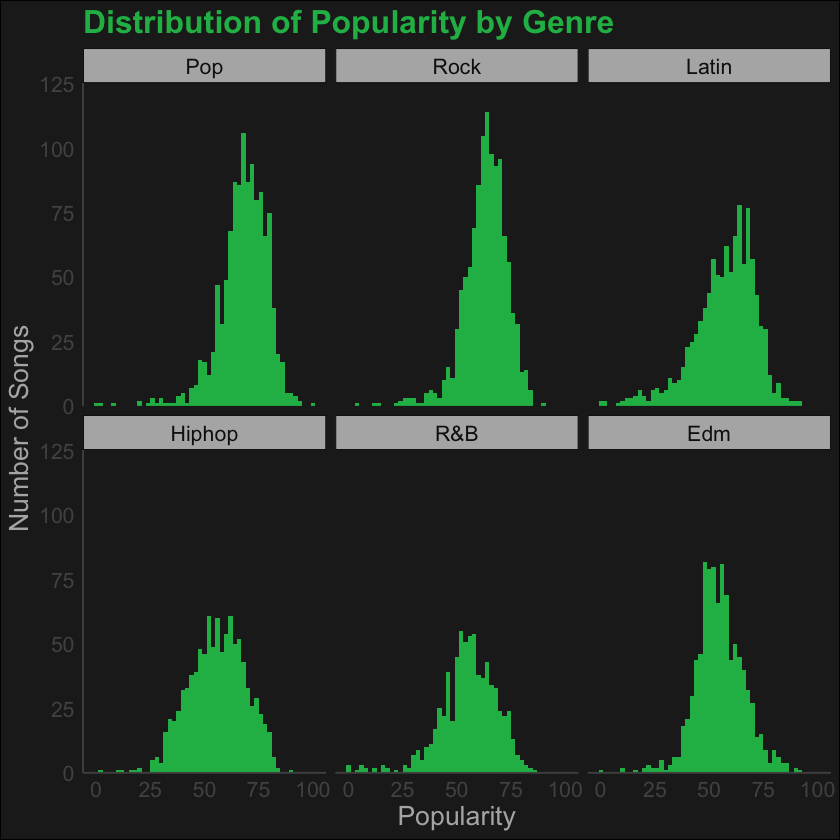

In [28]:
df %>%
  filter(genre != "rap") %>%
  mutate(genre = stringr::str_to_title(genre)) %>%
  group_by(genre) %>%
  mutate(avg_pop = mean(popularity)) %>%
  ungroup() %>%
  arrange(-avg_pop) %>%
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(x = popularity)) +
  geom_histogram(fill = SPOTIFY_GREEN, bins = 51) +
  facet_wrap(~genre, nrow = 2) +
  labs(x = "Popularity", y = "Number of Songs", title = "Distribution of Popularity by Genre") +
  spotify_theme() +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


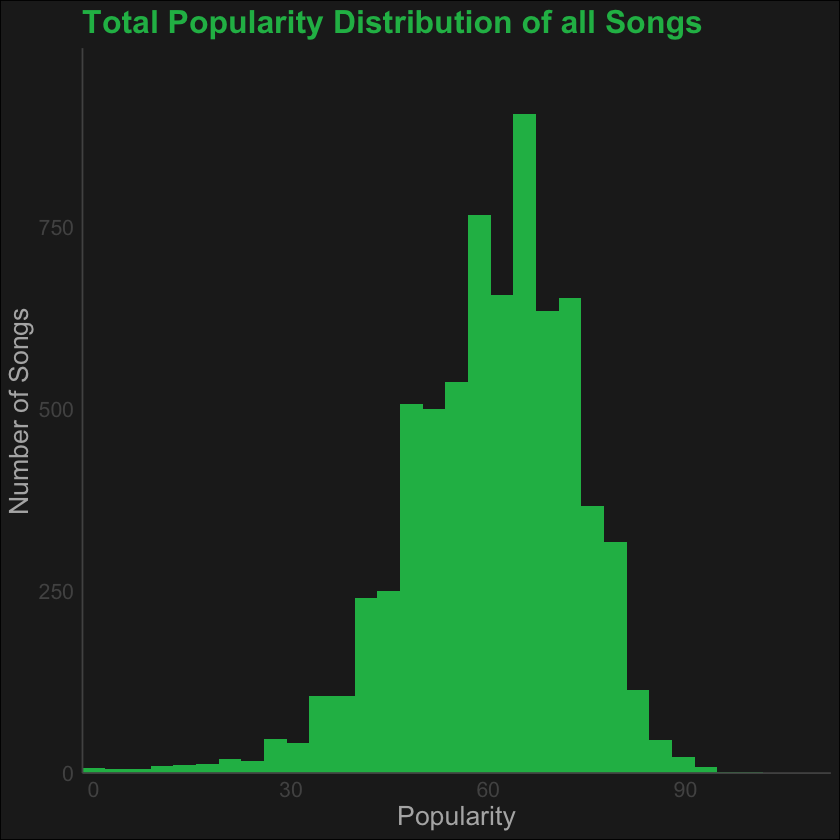

In [29]:
df %>%
  ggplot(aes(x = popularity)) +
  geom_histogram(fill = SPOTIFY_GREEN) +
  spotify_theme() +
  labs(x = "Popularity", y = "Number of Songs", title = "Total Popularity Distribution of all Songs") +
  scale_x_continuous(expand = expansion(mult = c(0, 0.1))) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

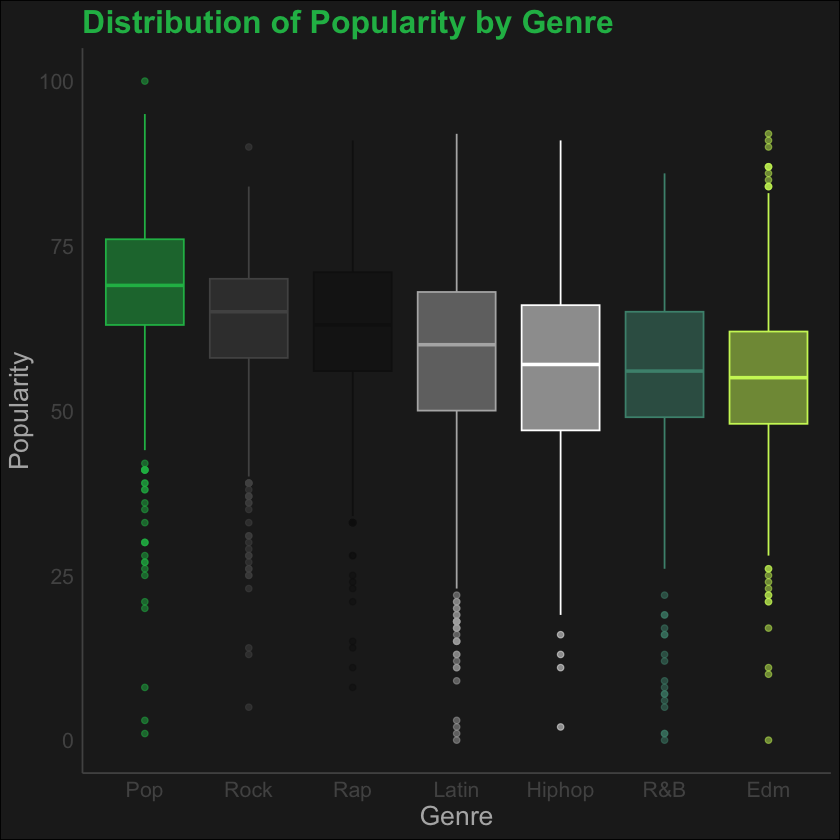

In [30]:
df %>%
  mutate(genre = stringr::str_to_title(genre)) %>%
  group_by(genre) %>%
  mutate(avg_pop = mean(popularity)) %>%
  ungroup() %>%
  arrange(-avg_pop) %>%
  mutate(genre = factor(genre, levels = unique(genre))) %>%
  ggplot(aes(y = popularity, x = genre, fill = genre, color = genre)) +
  geom_boxplot(alpha = 0.5) +
  labs(x = "Genre", y = "Popularity", title = "Distribution of Popularity by Genre") +
  spotify_theme(
    legend.position = "none"
  ) +
  scale_fill_spotify() +
  scale_color_spotify()

## Hypotehesis Testing
### t-test

1. Is the average tempo of the 'Pop' genre songs faster than that of 'Edm' songs?

Since the tempo variable is numerical and continuous, t-test is the most appropriate hypothesis test.

In [31]:
library(tidyverse)
library(dplyr)
library(knitr)

pop_tempo <- df$tempo[df$genre == 'pop']
edm_tempo <- df$tempo[df$genre == 'edm']

t_test_result <- t.test(pop_tempo, edm_tempo)

t_test_result



	Welch Two Sample t-test

data:  pop_tempo and edm_tempo
t = -8.1616, df = 2076.8, p-value = 5.666e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.121643  -6.199844
sample estimates:
mean of x mean of y 
 119.0462  127.2069 


In [32]:
latin_tempo <- df$tempo[df$genre == 'latin']
rock_tempo <- df$tempo[df$genre == 'rock']

t_test_result_2 <- t.test(latin_tempo, rock_tempo)

t_test_result_2


	Welch Two Sample t-test

data:  latin_tempo and rock_tempo
t = -2.7771, df = 2120.9, p-value = 0.005533
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.932001 -1.021610
sample estimates:
mean of x mean of y 
 122.4243  125.9012 


In [33]:
rb_tempo <- df$tempo[df$genre == 'r&b']
hiphop_tempo <- df$tempo[df$genre == 'hiphop']

t_test_result_3 <- t.test(rb_tempo, hiphop_tempo)

t_test_result_3


	Welch Two Sample t-test

data:  rb_tempo and hiphop_tempo
t = 2.8581, df = 1589.2, p-value = 0.004317
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.274115 6.848492
sample estimates:
mean of x mean of y 
 114.7414  110.6801 


In [34]:
rock_tempo <- df$tempo[df$genre == 'rock']
hiphop_tempo <- df$tempo[df$genre == 'hiphop']

t_test_result_4 <- t.test(rock_tempo, hiphop_tempo)

t_test_result_4


	Welch Two Sample t-test

data:  rock_tempo and hiphop_tempo
t = 12.075, df = 2026.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.74894 17.69309
sample estimates:
mean of x mean of y 
 125.9012  110.6801 


### Chi-squared test

2. Does 'popularity' of the 'pop' songs and 'edm' songs depend on the 'speechiness' of the songs?

In [35]:
df$popularity_s[df$popularity >= 70] <- 'high popularity'
df$popularity_s[df$popularity >= 30 & df$popularity < 70] <- 'moderate'
df$popularity_s[df$popularity < 30] <- 'low popularity'

The Chi Squared test :

The main goal of this chi squared analysis is to determine whether there is a significant association between the 'popularity_s' variable and the grouped 'speechiness' variable.

I binned speechiness values into three different bins.

The first bin corresponds to the interval [0, 0.33).
The second bin corresponds to the interval (0.33, 0.67].
The third bin corresponds to the interval (0.67, 1.0].

In [36]:
library(dplyr)
df <- df %>%
  filter(genre == "pop")

df$popularity_s <- as.factor(df$popularity_s)

# Group speechiness levels into three even groups
df$speechiness_grouped <- cut(df$speechiness, breaks = quantile(df$speechiness, probs = c(0, 1/3, 2/3, 1)), labels = FALSE)

# Calculate the average of 'speechiness' for each bin
bin_averages <- aggregate(df$speechiness, by = list(df$speechiness_grouped), FUN = mean)
print(bin_averages)

# Create a contingency table
tracks_count <- table(df$popularity_s, df$speechiness_grouped)
head(tracks_count)

# Perform the chi-squared test
chi_square_test <- chisq.test(tracks_count)
print(chi_square_test)

  Group.1          x
1       1 0.03452300
2       2 0.05367649
3       3 0.14521995


                 
                    1   2   3
  high popularity 202 195 179
  low popularity    1   4   5
  moderate        184 188 202

Warning message in chisq.test(tracks_count):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tracks_count
X-squared = 4.9817, df = 4, p-value = 0.2892



### Fisher's test

In [37]:
# fisher test
df$speechiness_c <- ifelse(df$speechiness < 0.05, 'low speechiness', 'high speechiness')
contingency_table <- table(df$popularity_s, df$speechiness_c)

fisher_result <- fisher.test(contingency_table)

print(fisher_result)


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.0008872
alternative hypothesis: two.sided



### Permutation test

#### High popularity pop songs vs. Low popularity pop songs

In [38]:
popularity_s <- df$popularity_s
speechiness <- df$speechiness

observed_stat <- mean(speechiness[popularity_s == "high popularity"]) - mean(speechiness[popularity_s == "low popularity"])

n <- 100000

permuted_stats <- numeric(n)

for (i in 1:n) {
  shuffled_speechiness <- sample(speechiness)

  permuted_stat <- mean(shuffled_speechiness[popularity_s == "high popularity"]) - mean(shuffled_speechiness[popularity_s == "low popularity"])

  permuted_stats[i] <- permuted_stat
}

p_value <- mean(permuted_stats >= observed_stat)

print(paste("Observed test statistic:", observed_stat))
print(paste("Permutation test p-value:", p_value))

[1] "Observed test statistic: -0.0276752166377816"
[1] "Permutation test p-value: 0.90375"


#### [High popularity vs. Moderate popularity] & [Moderate popularity vs. Low popularity]

In [39]:
speechiness_high <- speechiness[popularity_s == "high popularity"]
speechiness_middle <- speechiness[popularity_s == "moderate"]
speechiness_low <- speechiness[popularity_s == "low popularity"]

observed_stat_high_vs_middle <- mean(speechiness_high) - mean(speechiness_middle)
observed_stat_low_vs_middle <- mean(speechiness_low) - mean(speechiness_middle)

observed_stat_high_vs_middle
observed_stat_low_vs_middle

n <- 100000
permuted_stats_high_vs_middle <- numeric(n)
permuted_stats_low_vs_middle <- numeric(n)

for (i in 1:n) {
  shuffled_speechiness <- sample(speechiness)

  shuffled_speechiness_high <- shuffled_speechiness[popularity_s == "high popularity"]
  shuffled_speechiness_middle <- shuffled_speechiness[popularity_s == "moderate"]
  shuffled_speechiness_low <- shuffled_speechiness[popularity_s == "low popularity"]

  permuted_stat_high_vs_middle <- mean(shuffled_speechiness_high) - mean(shuffled_speechiness_middle)
  permuted_stat_low_vs_middle <- mean(shuffled_speechiness_low) - mean(shuffled_speechiness_middle)

  permuted_stats_high_vs_middle[i] <- permuted_stat_high_vs_middle
  permuted_stats_low_vs_middle[i] <- permuted_stat_low_vs_middle
}

p_value_high_vs_middle <- mean(permuted_stats_high_vs_middle >= observed_stat_high_vs_middle)
p_value_low_vs_middle <- mean(permuted_stats_low_vs_middle >= observed_stat_low_vs_middle)

print(paste("Observed test statistic (High vs. Middle):", observed_stat_high_vs_middle))
print(paste("Permutation test p-value (High vs. Middle):", p_value_high_vs_middle))

print(paste("Observed test statistic (Low vs. Middle):", observed_stat_low_vs_middle))
print(paste("Permutation test p-value (Low vs. Middle):", p_value_low_vs_middle))

[1] -0.01019194

[1] 0.01748328

[1] "Observed test statistic (High vs. Middle): -0.0101919413764576"
[1] "Permutation test p-value (High vs. Middle): 0.99678"
[1] "Observed test statistic (Low vs. Middle): 0.0174832752613241"
[1] "Permutation test p-value (Low vs. Middle): 0.18626"


### Bootstraping method

3. Is the mean of the energy of pop songs higher than that of edm songs?

In [44]:
pop_energy <- df$energy[df$genre == 'pop']
edm_energy <- df$energy[df$genre == 'edm']

diff_of_means <- numeric(100000)

for (i in 1:100000) {
  pop_sample <- sample(pop_energy, length(df), replace = TRUE)
  edm_sample <- sample(edm_energy, length(df), replace = TRUE)
  diff_of_means[i] <- mean(pop_sample) - mean(edm_sample)
}

real_diff <- mean(pop_energy) - mean(edm_energy)

interval <- quantile(diff_of_means, c(0.025, 0.975))
interval

bias <- mean(diff_of_means) - real_diff
bias

2.5%       97.5% 
-0.28838889 -0.08266528

[1] -0.0001145641

In [45]:
head(diff_of_means)

[1] -0.1887778 -0.1711111 -0.1190556 -0.2577778 -0.2895556 -0.1531111

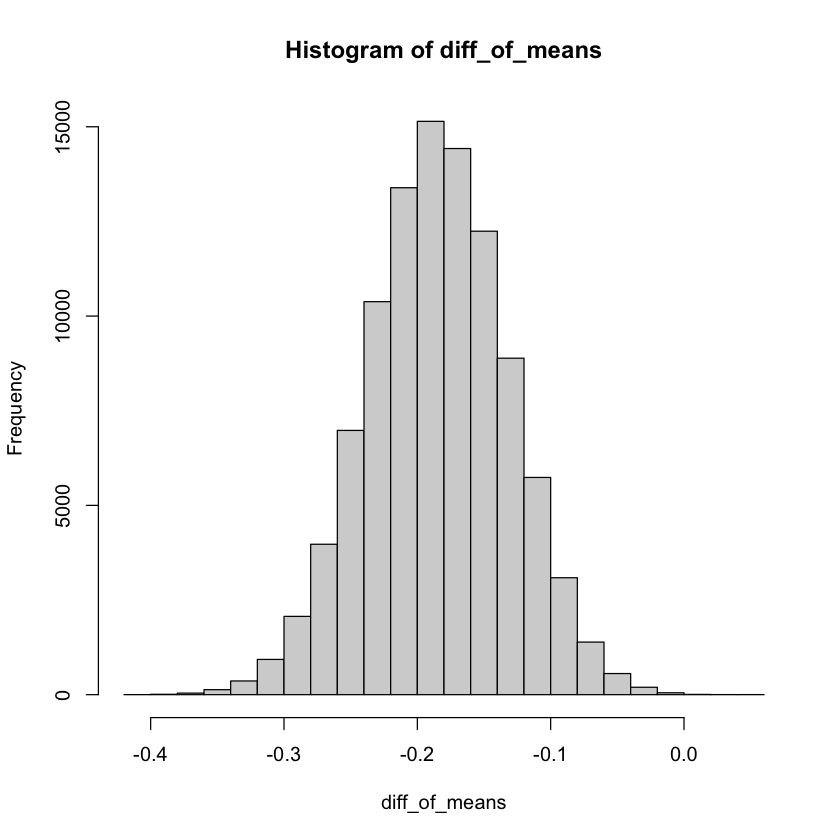

In [46]:
hist(diff_of_means)

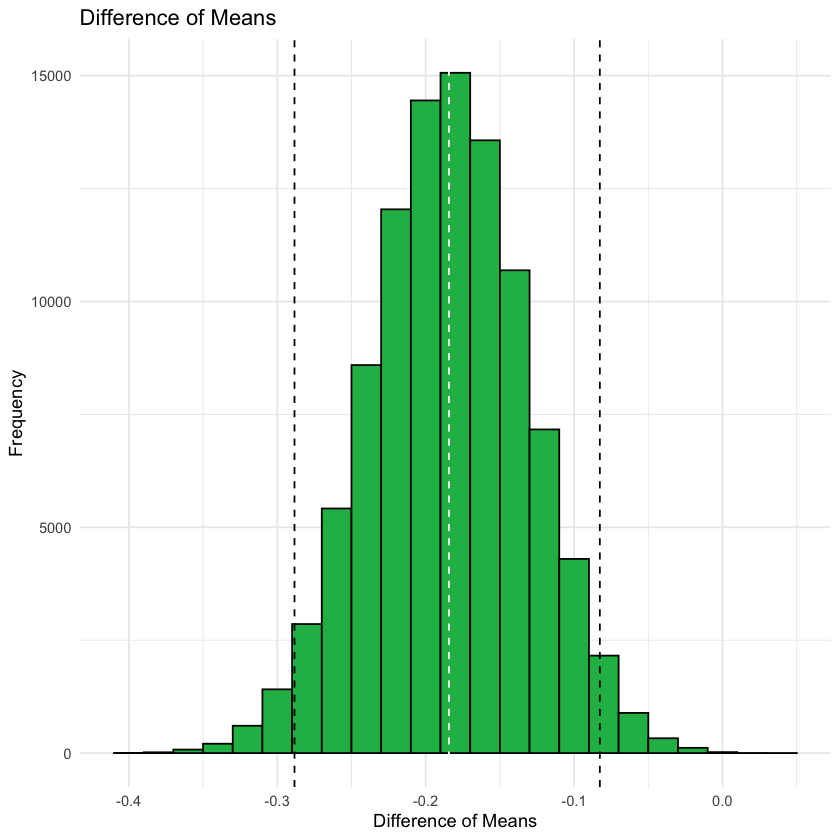

In [49]:
## plot the bootstrap distribution
difference <- data.frame(diff_of_means)

ggplot(data=difference) +
  geom_histogram(aes(x = diff_of_means), binwidth = 0.02, fill = "#1DB954", color = "black") +
  labs(title = "Difference of Means", x = "Difference of Means", y = "Frequency") +
  geom_vline(xintercept = real_diff, col = "white", linetype = "dashed") +
  geom_vline(xintercept = interval, col = "black", linetype = "dashed") +
  theme_minimal()